<a href="https://colab.research.google.com/github/twotablepush/OpenCV/blob/main/05_%EC%9E%84%EA%B3%84%EC%A0%90_%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## OpenCV 임계점 처리하기

cv2.threshold(image, thresh, max_value, type) : 임계값을 기준으로 흑/백으로 분류하는 함수

- image : 처리할 Gray Scale 이미지
- thresh : 임계 값(전체 픽셀에 적용)
- max_value : 임계값을 넘었을 때 적용할 값
- type : 임계점을 처리하는 방식
 - THRESH_BINARY : 임계 값보다 크면 max_value, 작으면 0
 - THRESH_BINARY_INV : 임계 값보다 작으면 max_value, 크면 0
 - THRESH_TRUNC : 임계 값보다 크면 임계 값, 작으면 그대로
 - THRESH_TOZERO : 임계 값보다 크면 그대로, 작으면 0
 - THRESH_TOZERO_INV : 임계 값보다 크면 0, 작으면 그대로

  

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sun.jpg to sun.jpg


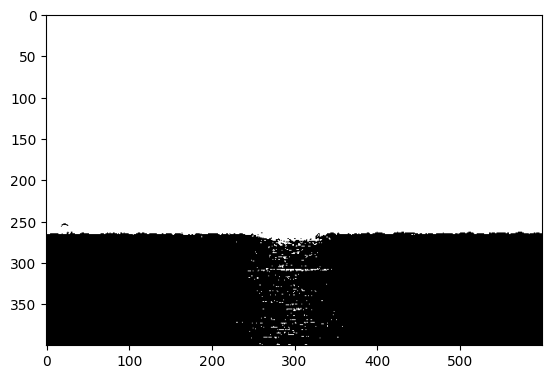

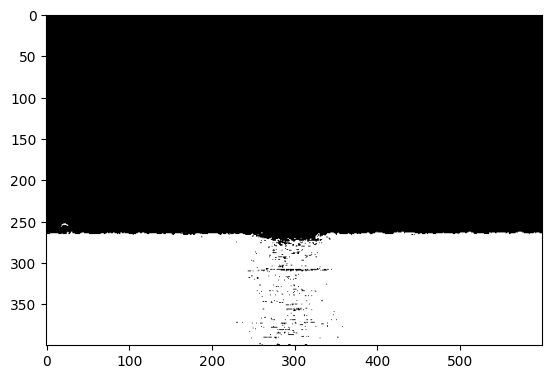

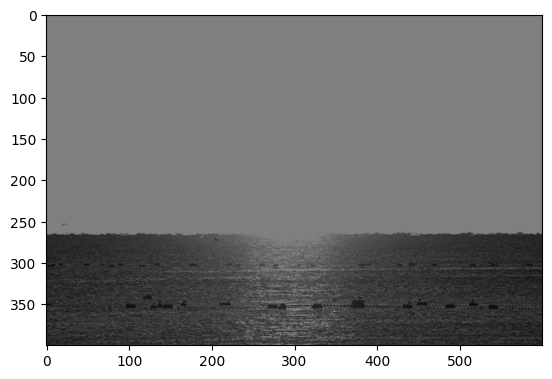

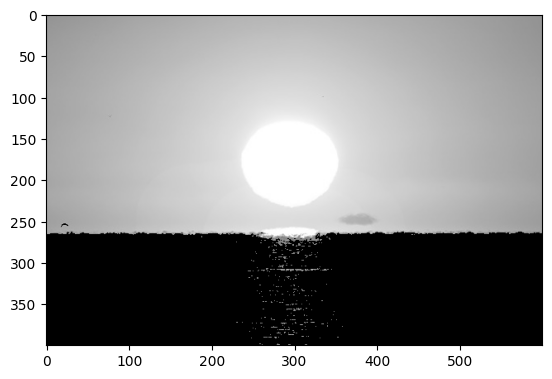

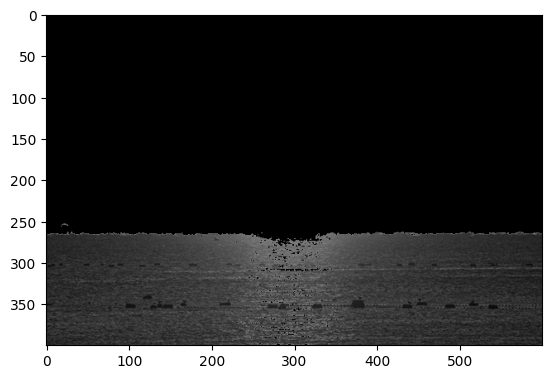

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('sun.jpg', cv2.IMREAD_GRAYSCALE)

images = []
ret, thres1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
ret, thres2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
ret, thres3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
ret, thres4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
ret, thres5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
images.append(thres1)
images.append(thres2)
images.append(thres3)
images.append(thres4)
images.append(thres5)

for i in images:
  plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
  plt.show()


## 이미지의 적응 임계점 처리
- 하나의 이미지에 다수의 조명 상태가 존재하는 경우 적용하면 좋다.

cv2.adaptiveThreshold(image, max_value, adaptive_method, type, block_size, C)
- max_value : 임계 값을 넘었을 때 적용할 값
- adaptive_method : 임계값을 결정하는 계산 방법

ADAPTIVE_THRESH_MEAN_C : 주변영역의 평균값으로 결정
- 적용할 픽셀(x, y)를 중심으로 하는 Block Size X Block Size 안에 있는 픽셀 값의 평균에서 C를 뺀 값을 임계점으로 설정

ADAPTIVE_THRESH_GAUSSIAN_C
- 적용할 픽셀 (x, y)를 중심으로 하는 Block Size X Block Size 안에 있는 Gaussian 윈도우 기반의 가중치들의 합에서 C를 뺀 값을 임계점으로 설정
- type : 임계점을 처리하는 방식
- block_size : 임계 값을 적용할 영역의 크기
- C : 평균이나 가중 평균에서 차감할 값

Adaptive Threshold를 이용하면, 전체 픽셀을 기준으로 임계 값을 적용하지 않는다.



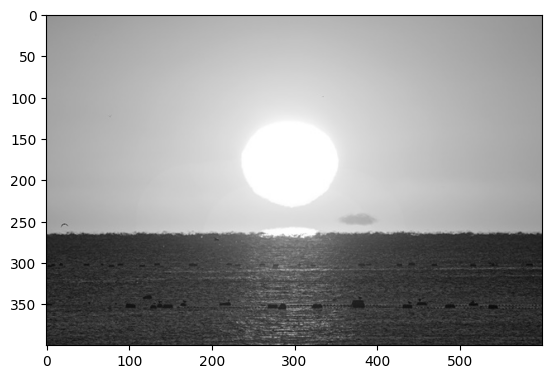

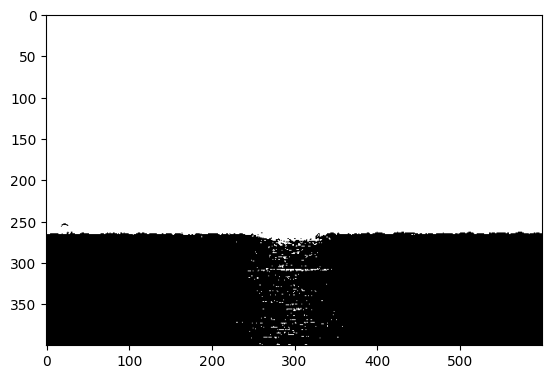

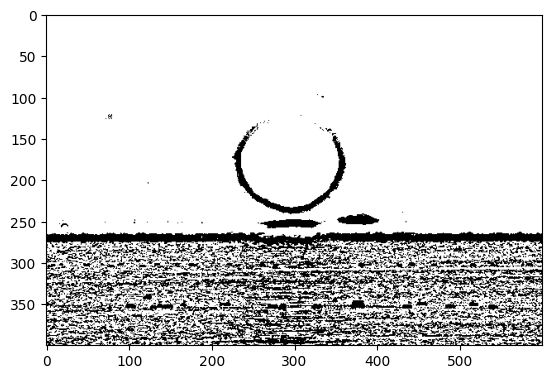

In [ ]:
import cv2

image = cv2.imread('sun.jpg', cv2.IMREAD_GRAYSCALE)

ret, thres1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
thres2 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 3)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(thres1, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(thres2, cv2.COLOR_BGR2RGB))
plt.show()